# MNIST Deep Learning Example with Keras

This Deep Learning Example uses Keras to import MNIST data and create a two layer network to recognize handwritten digits  -JPR October 2018

A quick version check of Tensorflow can verify that it was properly loaded into the environment

In [2]:
import tensorflow as tf
print(tf.__version__)

1.10.1


Import matplotlib.pyplot for data plots

In [3]:
import matplotlib.pyplot as plt

Import the MNIST data set from the Keras catalog.  This is a set of 60,000 28 x 28 images of handwritten digits used for deep learning training.  This code also imports the 10,000 28 x 28 validation images.  The size of the train_images data is shown with the shape method.

In [4]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
train_images.shape

Using TensorFlow backend.


(60000, 28, 28)

Display a single diigit from the Training Set using hte pyplot function

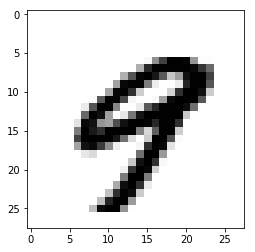

In [5]:
digit = train_images[1005]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Import the models and layers function from Keras.  Thi is used to create the two layer neural network with a 'dense' fully connected architecture.  THe first layer connect from the input has 512 fully connected nodes and the next layer has 110 fully connected loads that serve as the output identification of each digit.

In [6]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

Add the 'engine' of the neural network including the optimizer that impliments the gradient decent methods and the loss function that captures the error from the predictions.

In [7]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Prepare the Image Data by reshaping from a 3D data structure to a 2D one with each image stacked into a single vector

In [8]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32')/255

In [9]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Use the 'fit' method to actually train the network.  The number of epochs or times the algorithm will run through the entire data is set, along with the individual batch size.  The batch size is the number of inputs the algorithm can process in one step.

In [10]:
network.fit(train_images, train_labels, epochs=4, batch_size=128)

Epoch 1/4
60000/60000 [==============================] - 14s 230us/step - loss: 0.2574 - acc: 0.9243
Epoch 2/4
60000/60000 [==============================] - 12s 195us/step - loss: 0.1054 - acc: 0.9686
Epoch 3/4
60000/60000 [==============================] - 12s 195us/step - loss: 0.0696 - acc: 0.9798
Epoch 4/4
60000/60000 [==============================] - 12s 197us/step - loss: 0.0500 - acc: 0.9846


Use the evaluate method to test the newly trained network on the validation or 'test images'.  This is the set of 10,000 images with handwritten digits the training algorithm has not yet encountered.  The performace of the trained neural network is documented in the test loss and test accuracy measurements.

In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 153us/step


In [12]:
print('test_acc:', test_acc)

('test_acc:', 0.9785)


My Linux Laptob ran this case and had an accuracy of 97.85%